In [2]:
# import necessary modules
import pandas as pd
pd.options.display.max_columns=1000
pd.options.display.width=200
pd.options.display.min_rows=60
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

from hyperparamfuncs import *
from datetime import datetime

In [3]:
# create empty hyperparameter table
hyperparam_table = []

In [4]:
# run a Decision Tree model on raw data before any data cleaning/feature engineering
filename = 'data/clinvar_conflicting.csv'
hyper_dict = {'test_size': 0.05, 
              'random_state': 0, 
              'data_size': None,
              'scaling': None,
              'filename': filename,
              'model': DecisionTreeClassifier,
              'class_weight': None
             }
clf, hyperparam_table = train_eval(filename, hyper_dict, hyperparam_table)

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/gksullan/Documents/Springboard/Capstone_Project_1/conflicting_geneticvariants/hyperparamfuncs.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [5]:
# looks like data is imbalanced, let's balance class_weight in the model
filename = 'data/clinvar_conflicting.csv'
hyper_dict = {'test_size': 0.05, 
              'random_state': 0, 
              'data_size': None,
              'scaling': None,
              'filename': filename,
              'model': DecisionTreeClassifier,
              'class_weight': 'balanced'
             }
clf, hyperparam_table = train_eval(filename, hyper_dict, hyperparam_table)

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/gksullan/Documents/Springboard/Capstone_Project_1/conflicting_geneticvariants/hyperparamfuncs.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [6]:
# convert the hyperparam_table to dataframe and visualize
df_hyp = pd.DataFrame(hyperparam_table)
df_hyp.head(10)

,test_size,random_state,data_size,scaling,filename,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances
0,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,None,0.693865,0.991862,1940,482,516,322,0.392205,0.400498,0.384248,"[0.5980214557934986, 0.09421548420009841, 0.19..."
1,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.695706,0.990570,1938,484,508,330,0.399516,0.405405,0.393795,"[0.6009555559971032, 0.08926719893875158, 0.18..."


In [8]:
# final dataset: cleaned data with additional engineering NLP features for the REF and ALT alleles
filename = 'data/data_cleanednlp4.csv'
hyper_dict = {'test_size': 0.05, 
              'random_state': 0, 
              'data_size': None,
              'scaling': None,
              'filename': filename,
              'model': DecisionTreeClassifier,
              'class_weight': 'balanced'
             }
clf, hyperparam_table = train_eval(filename, hyper_dict, hyperparam_table)

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/gksullan/Documents/Springboard/Capstone_Project_1/conflicting_geneticvariants/hyperparamfuncs.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


In [9]:
# convert the hyperparam_table to dataframe and visualize
df_hyp = pd.DataFrame(hyperparam_table)
df_hyp.head(10)

,test_size,random_state,data_size,scaling,filename,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances
0,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,None,0.693865,0.991862,1940,482,516,322,0.392205,0.400498,0.384248,"[0.5980214557934986, 0.09421548420009841, 0.19..."
1,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.695706,0.990570,1938,484,508,330,0.399516,0.405405,0.393795,"[0.6009555559971032, 0.08926719893875158, 0.18..."
2,0.05,0,"(65188, 61)",None,data/data_cleanednlp4.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.697853,1.000000,1945,477,508,330,0.401216,0.408922,0.393795,"[0.13813333574308895, 0.04297086633686263, 0.1..."


In [10]:
# Use RandomSearchCV to find the best hyperparameters for this model
filename = 'data/data_cleanednlp4.csv'
param_dist = {"class_weight": [None, 'balanced'],
              "max_depth": [5, 10, 15, None],
              "max_features": ['sqrt', 'log2', None],
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]
             }

df = pd.read_csv(filename)
df, var_class = preprocess_data(df)
x_train, x_test, y_train, y_test = train_test_split(df, var_class,
                                                    test_size=hyper_dict['test_size'],
                                                    random_state=hyper_dict['random_state'])
# Instantiate a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Instantiate the RandomizedSearchCV object
clf_cv = RandomizedSearchCV(clf, param_dist, scoring='balanced_accuracy', cv=2)

# Fit it to the data
clf_cv.fit(x_train, y_train)

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/gksullan/Documents/Springboard/Capstone_Project_1/conflicting_geneticvariants/hyperparamfuncs.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter='best'),
 

In [11]:
# preview the best parameters and score
print(f"Tuned Decision Tree Parameters: {clf_cv.best_params_}")
print(f"Best score is {clf_cv.best_score_}")

Tuned Decision Tree Parameters: {'min_samples_leaf': 8, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced'}
Best score is 0.6784123544297094


In [12]:
cv_params = clf_cv.best_params_

In [13]:
# Using this model with the best params, predict labels on test data
hyper_dict = {'test_size': 0.05, 
              'random_state': 0, 
              'data_size': str(df.shape),
              'scaling': None,
              'filename': filename,
              'model': DecisionTreeClassifier
             }
clf = DecisionTreeClassifier(random_state=0)
clf.set_params(**cv_params)
hyper_dict.update(cv_params)
hyperparam_table += [hyper_dict]
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = clf.score(x_test,y_test)
hyperparam_table[-1]['test_score'] = score
training_score = clf.score(x_train,y_train)
hyperparam_table[-1]['train_score'] = training_score

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
hyperparam_table[-1]['tn'] = tn
hyperparam_table[-1]['fp'] = fp
hyperparam_table[-1]['fn'] = fn
hyperparam_table[-1]['tp'] = tp

f1 = f1_score(y_test,pred)
hyperparam_table[-1]['f1_score'] = f1
precision = precision_score(y_test,pred)
hyperparam_table[-1]['precision'] = precision
recall = recall_score(y_test,pred)
hyperparam_table[-1]['recall'] = recall

hyperparam_table[-1]['feature_importances'] = clf.feature_importances_

In [14]:
df_hyp = pd.DataFrame(hyperparam_table)
df_hyp.head(10)

,test_size,random_state,data_size,scaling,filename,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,min_samples_leaf,max_features,max_depth,criterion
0,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,None,0.693865,0.991862,1940,482,516,322,0.392205,0.400498,0.384248,"[0.5980214557934986, 0.09421548420009841, 0.19...",NaN,NaN,NaN,NaN
1,0.05,0,"(65188, 4)",None,data/clinvar_conflicting.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.695706,0.990570,1938,484,508,330,0.399516,0.405405,0.393795,"[0.6009555559971032, 0.08926719893875158, 0.18...",NaN,NaN,NaN,NaN
2,0.05,0,"(65188, 61)",None,data/data_cleanednlp4.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.697853,1.000000,1945,477,508,330,0.401216,0.408922,0.393795,"[0.13813333574308895, 0.04297086633686263, 0.1...",NaN,NaN,NaN,NaN
3,0.05,0,"(65188, 61)",None,data/data_cleanednlp4.csv,<class 'sklearn.tree.tree.DecisionTreeClassifi...,balanced,0.669018,0.689155,1587,835,244,594,0.524041,0.415675,0.708831,"[0.040665012844616294, 0.042371603892800924, 0...",8.0,NaN,10.0,gini


- Looking at row 2 of the hyperparameter table, the cleaned dataset `data_cleanednlp4.csv` provides the best performance in accuracy and f1 score. However, the training accuracy of 1 indicates that the model is overfit. 
- After RandomizedSearchCV for hyperparameter tuning, we can see that the gap between training and test accuracy has been closed, making it an overall better fit model with less of a chance of overfitting. Additionally, the f1 score has been improved compared to before hyperparameter tuning. 
- Compared to the best logistic regression model, this model offers an improved f1_score as well as test accuracy

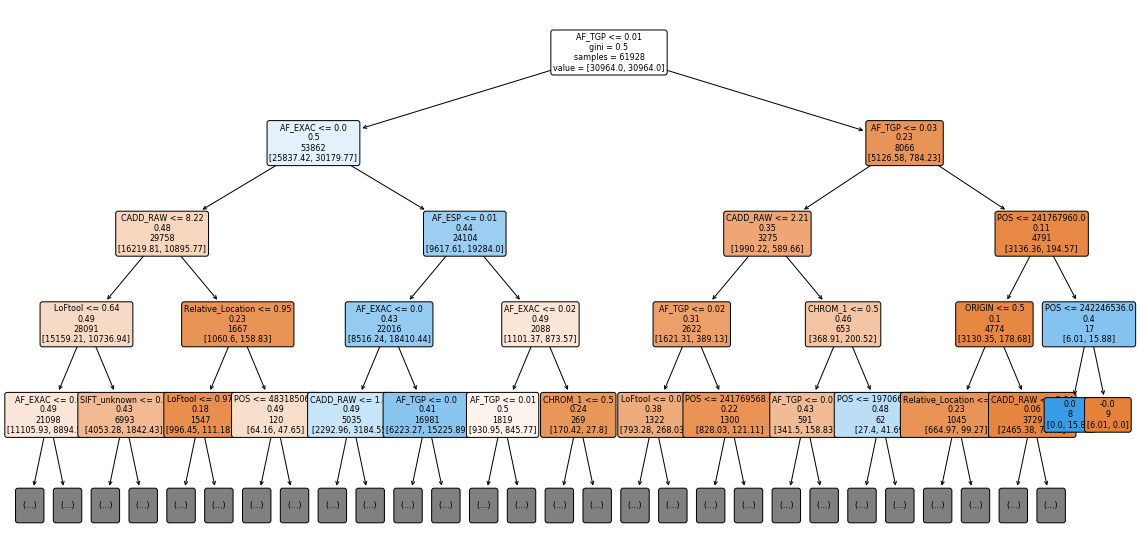

In [15]:
# visualize the decision tree to depth 4 
plt.figure(figsize=(20,10))
_ = plot_tree(clf, filled=True, fontsize=8, label='root', max_depth=4, precision=2, rounded=True, feature_names=list(df.columns))
plt.show()

In [16]:
# save the hyperparameter table to a .pickle file
time = datetime.now().strftime("%Y%m%d_%H:%M:%S")
filename = 'hyperparameter_tables/hyperparameter_table'+time+'.pkl'
df_hyp.to_pickle(filename)